In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df.loc[:122,"Region"] = 0
df.loc[123:,"Region"] = 1

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [8]:
df.dtypes

day             object
month           object
year            object
Temperature     object
 RH             object
 Ws             object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [9]:
df[["Region"]] = df[["Region"]].astype(int)

In [10]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [11]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [12]:
df = df.dropna().reset_index(drop=True)

In [13]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [14]:
df.iloc[122]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Region                   1
Name: 122, dtype: object

In [15]:
df = df.drop(122).reset_index(drop=True)

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [17]:
df.iloc[122]

day                      1
month                    6
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   1
Name: 122, dtype: object

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [19]:
df.columns = df.columns.str.strip(" ")

In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [22]:
df.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [23]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [24]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [25]:
df_copy = df.drop(["day","month","year"],axis=1)

In [26]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [27]:
df_copy["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [28]:
df_copy["Classes"] = np.where(df_copy["Classes"].str.contains("not fire"),0,1)

In [29]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [30]:
df_copy[df_copy["Classes"]==1]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
10,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1,0
11,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
231,29,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1,1
233,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1,1
234,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,1,1
235,35,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,1,1


In [31]:
df_copy["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

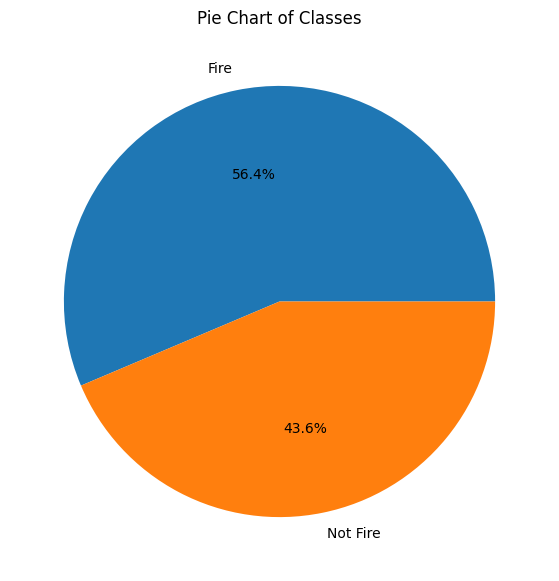

In [32]:
percentage = df_copy["Classes"].value_counts(normalize=True)*100
classlabels = ["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes")
plt.show()

In [33]:
df_copy.to_csv("Cleaned_Algeria.csv")

In [34]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold :
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
x = df_copy.drop(["Classes"],axis=1)
y = df_copy[["Classes"]]


In [36]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [71]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.663496,-0.287515,-0.398214,0.690120,0.481139,0.364083,0.619728,0.454733,0.576780,0.308141
RH,-0.663496,1.000000,0.304370,0.257538,-0.638144,-0.388493,-0.211594,-0.697010,-0.337244,-0.583403,-0.435410
Ws,-0.287515,0.304370,1.000000,0.146191,-0.204728,-0.008123,0.056499,-0.015108,0.018219,0.008627,-0.157330
Rain,-0.398214,0.257538,0.146191,1.000000,-0.625820,-0.313902,-0.298057,-0.362885,-0.320264,-0.335450,-0.127334
FFMC,0.690120,-0.638144,-0.204728,-0.625820,1.000000,0.597417,0.481267,0.735223,0.582390,0.690321,0.342729
DMC,0.481139,-0.388493,-0.008123,-0.313902,0.597417,1.000000,0.877889,0.666212,0.982748,0.877581,0.212028
DC,0.364083,-0.211594,0.056499,-0.298057,0.481267,0.877889,1.000000,0.474775,0.939456,0.722653,-0.045769
ISI,0.619728,-0.697010,-0.015108,-0.362885,0.735223,0.666212,0.474775,1.000000,0.627778,0.912599,0.328295
BUI,0.454733,-0.337244,0.018219,-0.320264,0.582390,0.982748,0.939456,0.627778,1.000000,0.857570,0.114505
FWI,0.576780,-0.583403,0.008627,-0.335450,0.690321,0.877581,0.722653,0.912599,0.857570,1.000000,0.244974


In [72]:
x_test.shape

(81, 11)

In [73]:
corr_features = correlation(x_train,0.85)

In [76]:
corr_features

{'BUI', 'DC'}

In [77]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [78]:
x_train.shape,x_test.shape

((162, 9), (81, 9))

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()

In [81]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Text(0.5, 1.0, 'After Scaling')

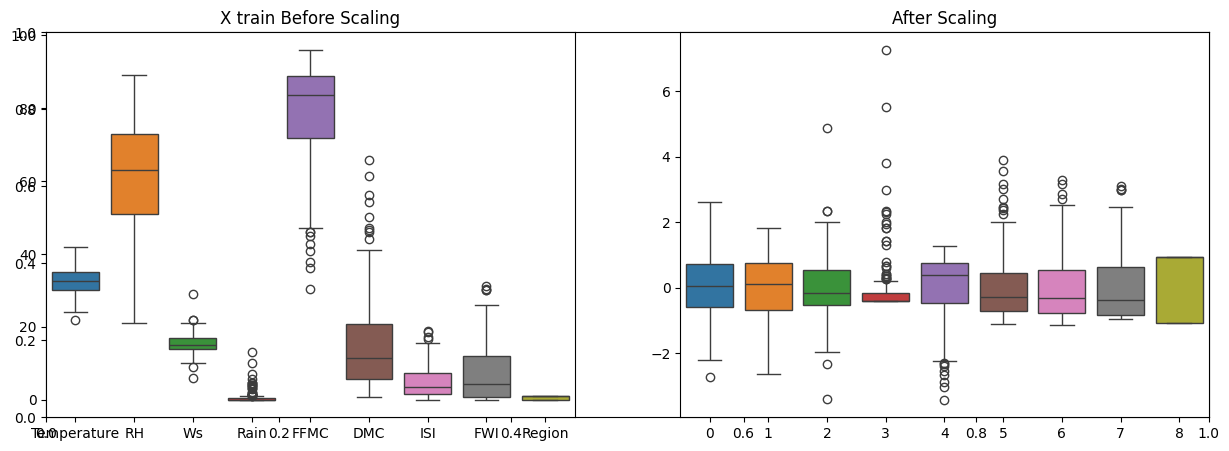

In [82]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.boxplot(data=x_train)
plt.title("X train Before Scaling")

plt.subplot(122)
sns.boxplot(data=x_train_scaled)
plt.title("After Scaling")


In [83]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train_scaled,y_train)


LinearRegression()

In [84]:
reg.score(x_test_scaled,y_test)

0.6616016805704983

In [85]:
y_pred = reg.predict(x_test_scaled)

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
mse,mae,rmse

(0.08242044115963172, 0.2273259010790097, 0.2870896047571763)

In [87]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.6616016805704983

In [88]:
from sklearn.linear_model import Lasso
reg1 = Lasso()
reg1.fit(x_train_scaled,y_train)
y_pred = reg1.predict(x_test_scaled)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
mse,mae,rmse,score

(0.24417009602194792,
 0.49108367626886157,
 0.4941357060787531,
 -0.0025031289111390187)

In [89]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(x_train_scaled,y_train)
y_pred = rid.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
mse,mae,rmse,score

(0.08152886213417179,
 0.2269823529209462,
 0.28553259382104135,
 0.665262287570525)

In [90]:
from sklearn.linear_model import ElasticNet
reg2 = ElasticNet()
reg2.fit(x_train_scaled,y_train)
y_pred = reg2.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
mse,mae,rmse,score

(0.24417009602194792,
 0.49108367626886157,
 0.4941357060787531,
 -0.0025031289111390187)

In [91]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(rid,open("ridge.pkl","wb"))